__Hi Kagglers,__

Welcome to my kernel
- **I have learned a lot in this little journey with Bangalore restaurants, hope you do too :)**
- **Plase feel free to share your insights, toughts and/or comments below, and upvote if you like it**


In this analysis I have tried to get in deep understanding of the data and get new insights
So my approach is as follows:

- Clean the data as possible 
- Not to lose much records by ease of just removing the missing values
- Make cleaning for the reviews_list column, it contains much useful info

The apptoach stepwise as follow:

### Ceaning Data
   - #### 1. Adjust column names and dropped irrelevant columns
   - #### 2. Removing duplicates
   - #### 3. Removing Null values
   - #### 4. return  review list column to its type as list of tuples instead of string and clean it.
   - #### 5. Adjust name column
   - #### 6. Adjust column types 
   - #### 8. Clean the dish_like  column 

### Finally  Getting Insights and  Data Visualisation

Without further due, let's start !

In [1]:
# import the needed libraries
import numpy as np
import pandas as pd
import ast 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 10,6
plt.xkcd() # let's have some funny plot
%matplotlib inline

In [2]:
# load data to pandas dataframe
df = pd.read_csv('../input/zomato.csv')

In [3]:
# explore the top five rows
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
# get some info about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

# Cleaning Data

In [5]:
# make a copy of our data
data = df.copy()

## 1. Adjust column names and dropped irrelevant columns

In [6]:
# explore columns related to the addrress
data.loc[:,['address','location','listed_in(city)']].sample(8,random_state=1)

,address,location,listed_in(city)
8157,"2A/3, 15th Cross, Green Garden Layout, Shirdi ...",Marathahalli,Brookefield
32498,"18, Shreenidhi Arcade, Maruthi Nagar Main Road...",BTM,Koramangala 6th Block
4679,"56, Near Passport Office, Outer Ring Road, Bel...",Bellandur,Bellandur
2445,"14/6, 9th Main Road, Opposite Water Tank, 100 ...",BTM,Bannerghatta Road
27316,"321/3A, Sharif Complex, Hosur Main Road, Oppos...",Hosur Road,Koramangala 4th Block
2735,"4/5, 5th Cross, Laxmi Road, Shanti Nagar, Bang...",Shanti Nagar,Basavanagudi
34577,"9, Maruthi Nagar, Madiwala, BTM, Bangalore",BTM,Koramangala 6th Block
32233,"13th cross, 16th main, Tavarekere Main Road, B...",BTM,Koramangala 6th Block


> - So, Here we have three columns all refer to same piece of information that we are interested in, **address**
- Let's select which one to keep and delete the others

**Update**

> **Himanshu Poddar wrote**
> 
> > Actually the two columns..... listed in(city) and location are different. location means where the restaurant actually is and listed in(city) means the restaurant also delivers to that place beside the area where it is located. Thats why we have 51K data.

- As per the above answer from dataset creator, so we are going to keep the location column and drop the address and listed_in(city) columns
- columns **url** , **phone** , we are not interested in ,to be dropped too

In [7]:
# drop unnecessary columns
column_to_drop = ['address','url' ,'listed_in(city)', 'phone']
data.drop(columns=column_to_drop, axis=1,inplace=True)


In [8]:
# check the columns now
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)'],
      dtype='object')

In [9]:
# rename non descriptive columns
# As per metadat 'listed_in(type)' is a type of meal
data.rename(columns={'approx_cost(for two people)': 'average_cost', 'listed_in(type)': 'meal_type'}, inplace=True)

In [10]:
data.sample(3,random_state=1)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,meal_type
8157,Krishna Bhojan,No,No,NaN,0,Marathahalli,Quick Bites,NaN,North Indian,300,"[('Rated 4.0', 'RATED\n Good food\n\n\nA litt...",[],Dine-out
32498,El Salver,Yes,Yes,3.9 /5,74,BTM,Casual Dining,Fish Curry,"North Indian, Chinese, South Indian",900,"[('Rated 4.0', 'RATED\n This is a new restaur...","['El Salver Chicken Roast', 'Fish Finger', 'Ch...",Delivery
4679,Atithi Aramane Veg,Yes,No,3.9/5,48,Bellandur,Quick Bites,NaN,"South Indian, North Indian, Chinese",300,"[('Rated 3.0', 'RATED\n So finally I found so...","['Gobi Manchurian', 'Baby Corn Manchurian', 'P...",Dine-out


## 2. Removing duplicates
- We are going to remove duplicates data when the entire rows is duplicated
- As same name could be available for other meal types and hence other ratings and average cost (this is a chain restaurant)

In [11]:
# check for duplicate values
data.duplicated().sum()

9809

In [12]:
# drop the duplicates
data.drop_duplicates(inplace=True)

## 3. Removing Null values

In [13]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(2)

name             0.00
online_order     0.00
book_table       0.00
rate            10.15
votes            0.00
location         0.03
rest_type        0.41
dish_liked      48.22
cuisines         0.09
average_cost     0.60
reviews_list     0.00
menu_item        0.00
meal_type        0.00
dtype: float64

### Before removing null values 

> - As we notice around 50 % of data will be lost if we delete the nan values in dish_liked column
- We will keep that column for now
- let's check for rate column as it contains 15% of its points as null value

In [14]:
# check for unique values in the rate column
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

> - So, Now we found this column has **'NEW' ,"-"** values which should replaced by np.nan
- there is /5 as extra and no need for it
- values represents as strings instead of float


In [15]:
# adjust rate column 
# convert "NEW" & "-" to np.nan
data.rate.replace(('NEW','-'),np.nan,inplace =True)
# first make it as string
data.rate = data.rate.astype('str')
# remove the "/5" 
data.rate = data.rate.apply(lambda x: x.replace('/5','').strip())
# convert column type to float
data.rate = data.rate.astype('float')

In [16]:
# test for data type
data.rate.dtype

dtype('float64')

In [17]:
# check for unique values
data.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

Back to our job for deleting Null values
> - We are intersted in this analysis for the rate and average_cost relationship , so we'll drop null values in these two columns
- But first let's have a look on the review list column
- We here are trying to save as much of our data

## 4. Adjust  review list column
> - This column appears as string instaed of list of tuples
- using ast library to return it back to list and then accessing it for more and easy analysis
- extract the review text only from each tuple in each list and clear it
-  make a new column reviews_text

In [18]:
# if we check for each value type
type(data.reviews_list[0])

str

In [19]:
# return to a list of tuples
data.reviews_list = data.reviews_list.apply(lambda x: ast.literal_eval(x))

In [20]:
# check for our work now
type(data.reviews_list[0])

list

In [21]:
# check for the first input
data.reviews_list[0][0]

('Rated 4.0',
 'RATED\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.')

- As we can see that each element in our review_list is a tuple the first item is that tuple is the rate inputed by the user whle writting his/her review.
- We can make use of this to down the number of missed values in that column.
- Let's make a try
- We are going to extract the rate for the first input restaurant in our data from the review column

In [22]:
# extract the rate for the first input from the review column
x = [float(i[0].replace('Rated','').strip()) for i in data.reviews_list[0]]
round((sum(x)/len(x)),1)

4.1

In [23]:
# first rate column 
data.rate[0]

4.1

- even if we notice a little difference it will be more valuable than just throw columns
- let's make our function

In [24]:
def get_rate(x):
    '''
    extract the rate value out of a string inside tuple
    '''
    # ensure that x is not Null and there is more than one rate
    if not x or len(x) <= 1:
        return None
    rate = [float(i[0].replace('Rated','').strip())  for i in x if type(i[0])== str]
    return round((sum(rate)/len(rate)),1)

* Now, let's make a new column for the rate extracted fom review, we will call it review_rate

In [25]:
# create new column
data['review_rate']  = data.reviews_list.apply(lambda x : get_rate(x))

In [26]:
# compare
data.loc[:,['review_rate','rate']].sample(10,random_state=1)

,review_rate,rate
43076,4.0,4.0
49259,NaN,3.3
43257,4.2,4.5
30157,3.1,3.3
41110,4.0,3.8
34220,4.0,4.0
42520,3.3,3.0
45657,2.3,3.2
38218,3.9,3.3
4568,3.5,NaN


- Quiet close!
- Now, to replace the missing values in rate column with those from review_column

In [27]:
# get the before number of null values
data.rate.isna().sum()

5914

In [28]:
# apply the changes
nan_index = data.query('rate != rate & review_rate == review_rate').index
for i in nan_index:
    data.loc[i,'rate'] = data.loc[i,'review_rate'] 

In [29]:
# update the number of null values now
data.rate.isna().sum()

4861

- We save around  1000 records 

In [30]:
# check now
((data.isna().sum()/data.shape[0])*100).round(2)

name             0.00
online_order     0.00
book_table       0.00
rate            11.60
votes            0.00
location         0.03
rest_type        0.41
dish_liked      48.22
cuisines         0.09
average_cost     0.60
reviews_list     0.00
menu_item        0.00
meal_type        0.00
review_rate     25.71
dtype: float64

In [31]:
# first let's drop the review_rate column now
data.drop(columns='review_rate',axis=1,inplace=True)

In [32]:
# drop null values
data.dropna(subset=['rate', 'average_cost'],inplace=True)

In [33]:
# test for data size
data.shape

(36840, 13)

In [34]:
# check for percentage of null values 
((data.isna().sum()/data.shape[0])*100).round(2)

name             0.00
online_order     0.00
book_table       0.00
rate             0.00
votes            0.00
location         0.00
rest_type        0.33
dish_liked      41.47
cuisines         0.02
average_cost     0.00
reviews_list     0.00
menu_item        0.00
meal_type        0.00
dtype: float64

It's quiet fair now that all our dataset has rate and average_cost

## 5. Adjust name column
> To unify the name column we will make all values as titles

In [35]:
# fix the name column
data.name = data.name.apply(lambda x: x.title())

## 6. Adjust column types 
> - online_order & book_table presented as strings instead of bools (working with True/False make it easier to analyze)
- average-cost as strings instead of int
- add the cost_range column for ease of classification

In [36]:
# convert Yes/No to True/False in coumns online_order & book_table
data.online_order.replace(('Yes','No'),(True,False),inplace =True)
data.book_table.replace(('Yes','No'),(True,False),inplace =True)

In [37]:
# adjust the average_cost column
data.average_cost = data.average_cost.apply(lambda x: int(x.replace(',','')))

In [38]:
# check for values
data.average_cost.unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199, 1100, 1600,  230,  130, 1700, 1400, 1350, 2200, 2000, 1800,
       1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,   40, 1250,
       3500, 4000, 2400, 2600, 1450,   70, 3200,  240, 6000, 1050, 2300,
       4100,  120, 5000, 3700, 1650, 2700, 4500,   80])

### Notes:
- we are going to make a new column of cost_ranges which will be as follows:
> - very cheap : 0-200
 - cheap : 200-500
 - moderate : 500-1000 
 - expensive : 1000-3000
 - very expensive : 3000-6000
- we will do the same for average_rate column, so we can get insights from categories

In [39]:
# create cost_range column
bins = [0,200, 500, 1000, 3000, 6000]
labels = ['very cheap','cheap','moderate','expensive','extra expensive']
data['cost_range']= pd.cut(data.average_cost, bins=bins,labels=labels)

In [40]:
# we will do the same for rate column
bins =[0,2,3,4,5]
labels =['low','moderate','high','exceptional']
data['rate_range'] = pd.cut(data.rate, bins=bins,labels=labels)

In [41]:
data.loc[:,['rate','rate_range']].sample(5,random_state=1)

,rate,rate_range
8278,4.4,exceptional
43912,4.5,exceptional
14694,3.6,high
8489,3.9,high
34423,3.1,high


## 7. Clean the review list column 
> - After returning it back to its nature of a list of tuples, we are able now to extract the reviews text
- hope to get more insights about each restaurants from its reviewers

In [42]:
# clear the text
def clear_text(t):
    '''
    clear the input text t
    '''
    return ' '.join([i[1].replace("RATED\n  ",'') for i in t]).encode('utf8').decode('ascii',errors='replace').\
           replace('?','').replace('�','').replace('\n','').replace('.',' ').strip().lower()

In [43]:
# make a new column reviews_text
data['reviews_text'] = data.reviews_list.apply(lambda x: clear_text(x))

In [44]:
# check part of reviews text for the first restaurant
data.reviews_text[0][:500]

'a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrange'

## 8. Clean the dish_like  column 

> - make it all as lowercase.
- some missing values could be extracted also from the review_list

In [45]:
data.dish_liked.nunique()

5250

In [46]:
# make lower case
data.dish_liked = data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [47]:
# collect the dishes' names and make a menu list for all kind of dishes
menu_list = [e.strip() for i in data.dish_liked.tolist() if isinstance(i,str) and len(i) >0 for e in i.split(',')]

# Now collect the unique dish name 
menu_set = set(menu_list)

As we now has the unique list of dishes we now could replace those with null values with some useful data

In [48]:
# example
data.dish_liked[10000]

nan

In [49]:
# the solution 
menu_set.intersection(data.reviews_text[10000].split(' '))

{'chicken', 'fish', 'mutton', 'rice', 'thali'}

Cool !!, Now we could do that for all other missing values in dish_liked column but first let's create the dish_n_review column

## 8. Create the dish_n_review  column 

> - extact the dished been reviewed from the review text

In [50]:
#creat a new column for the reviewed dish
data['dish_n_review'] = data.reviews_text.apply(lambda x: ', '.join(list(menu_set.intersection(x.split(' ')))))

In [51]:
# get sample to compare
data.query('dish_liked != dish_liked')[['dish_liked','dish_n_review']].sample(5,random_state=1)

,dish_liked,dish_n_review
35277,NaN,"chicken, fries, shawarma"
11918,NaN,chicken
44043,NaN,"mutton, chicken, biryani, tikka"
3703,NaN,"coffee, tea, roti"
51190,NaN,"vegetarian, chicken, prawn"


So now, we can replace this missed values from the dish_n_review

In [52]:
# fill in the missing values in dish_liked column with data from reviews
nan_index = data.query('dish_liked != dish_liked & dish_n_review == dish_n_review').index
for i in nan_index:
    data.loc[i,'dish_liked'] = data.loc[i,'dish_n_review']

In [53]:
# Now let's test our work
data.dish_liked[10000]

'thali, fish, chicken, mutton, rice'

- Now we can drop the menu_list & menu_set

In [54]:
del menu_list
del menu_set

In [55]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(3)

name             0.000
online_order     0.000
book_table       0.000
rate             0.000
votes            0.000
location         0.000
rest_type        0.328
dish_liked       0.000
cuisines         0.022
average_cost     0.000
reviews_list     0.000
menu_item        0.000
meal_type        0.000
cost_range       0.000
rate_range       0.000
reviews_text     0.000
dish_n_review    0.000
dtype: float64

> - I guess it's quiet clean now.
- It's time for the fun part of getting insights with data visualtisation

# Getting Insights

In [56]:
# plotting parameters
# set the color for all graphs
colors = ['grey' for i in range(data.location.nunique())]
colors[0] = 'orange'

In [57]:
# collect the column with string (object type)
str_cols = [i for i in data.columns if (data[i].dtypes == object)]
# show a sample of these columns
data[str_cols].sample(5,random_state=1)

,name,location,rest_type,dish_liked,cuisines,reviews_list,menu_item,meal_type,reviews_text,dish_n_review
8278,Punjab Bistro,Koramangala 7th Block,"Casual Dining, Bar","chicken shorba, jumbo prawns, beer, cocktails,...",North Indian,"[(Rated 4.0, RATED\n I had been to this first...",[],Buffet,i had been to this first time for bfc get toge...,"naan, kulfi, rasmalai, mutton, manchurian, tik..."
43912,Misu,St. Marks Road,"Casual Dining, Bar","sushi, dumplings, khau suey, noodles, cocktail...","Asian, Japanese, Korean, Indonesian, Malaysian...","[(Rated 5.0, RATED\n Got a quick seating the ...",[],Pubs and bars,got a quick seating the minute we reached had ...,"margarita, salmon, noodles, tempura, sandwich,..."
14694,The Good Bowl,Indiranagar,"Takeaway, Delivery","tikki, chicken, omelette, rice, tikka, brownie","Italian, North Indian, Biryani","[(Rated 5.0, RATED\n I ordered two non veg ri...","['Pindi Chole Rice Bowl', 'Dal Makhani Rice Bo...",Delivery,"i ordered two non veg rice bowls, it is served...","tikki, chicken, omelette, rice, tikka, brownie"
8489,Savoury Restaurant,BTM,Casual Dining,"shawarma, bamboo biryani, chicken shawarama, c...","Arabian, North Indian, Chinese, Fast Food","[(Rated 4.0, RATED\n my review 11th january 2...",[],Delivery,my review 11th january 2019 dinner on the way ...,"fish, chicken, sake, bbq, mutton, rice, biryan..."
34423,Chaiwala,Koramangala 1st Block,Quick Bites,"poha, bread omelette, ginger chai, ginger tea",Fast Food,"[(Rated 1.0, RATED\n Worst n pathetic. Cheese...","['Adrak Elaichi Chai', '2 Samosa with Ginger C...",Dine-out,worst n pathetic cheese maggie hardly they pu...,"maggi, tea, poha"


A lot of the values in these columns appeared as comma separated and contains much information behind if we split it and count each separately

In [58]:
# set a function to count the values in a comma separated string 
def clear_text_2pd(x):
    'extract the data and count it from comma separted string values in column x returns a pd.Series ready to plot'
    return pd.Series([e.strip() for i in data[data[x].notnull()][x] for e in i.split(',') if e!='[]' if i ])

### Quick insights

## Top 10 dish liked and reviewed dish in Bangalore

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


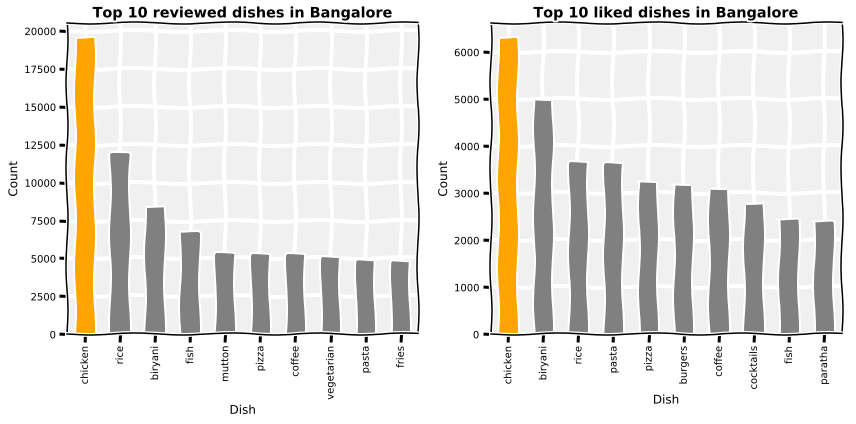

In [59]:
# plot 2 bar plots
plt.rcParams['figure.figsize'] = 12,6
plt.subplot(1,2,1)
# top 10 reviewed dishes
clear_text_2pd('dish_n_review').value_counts()[:10].plot('bar',color=colors,grid=True)
plt.title('Top 10 reviewed dishes in Bangalore', weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

# top 10 dish_liked
plt.subplot(1,2,2)
clear_text_2pd('dish_liked').value_counts()[:10].plot('bar',color=colors,grid=True)
plt.title('Top 10 liked dishes in Bangalore', weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')
plt.tight_layout();

**Chicken** at the top of list either liked or reviewed

## Top restaurants type and Top restaurant chain in Bangalore

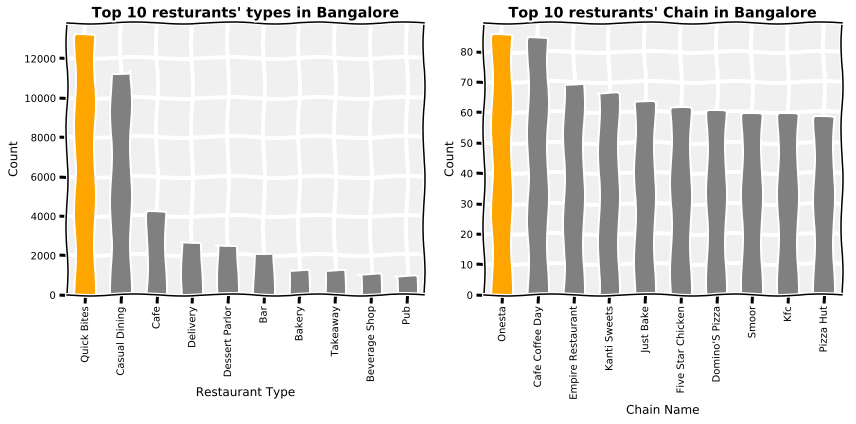

In [60]:
# plot 2 bar plots
plt.rcParams['figure.figsize'] = 12,6
plt.subplot(1,2,1)
# top 10 restaurants types
clear_text_2pd('rest_type').value_counts()[:10].plot('bar',color=colors,grid=True)
plt.title('Top 10 resturants\' types in Bangalore', weight='bold')
plt.xlabel('Restaurant Type')
plt.ylabel('Count');

plt.subplot(1,2,2)
# top 10 restaurants Chain
clear_text_2pd('name').value_counts()[:10].plot('bar',color=colors,grid=True)
plt.title('Top 10 resturants\' Chain in Bangalore', weight='bold')
plt.xlabel('Chain Name')
plt.ylabel('Count')
plt.tight_layout();

> - **Quick Bites** is the most commom restaurant type in Bangalore.
> - **Onesta** and **Cafe Coffee Day** are the biggest chains in Bangalore.

Business wise, one should be careful before going into **Quick Bites** restaurants as more than 16000 restaurants serve in this category !

## Top 10 cusines in Bangalore

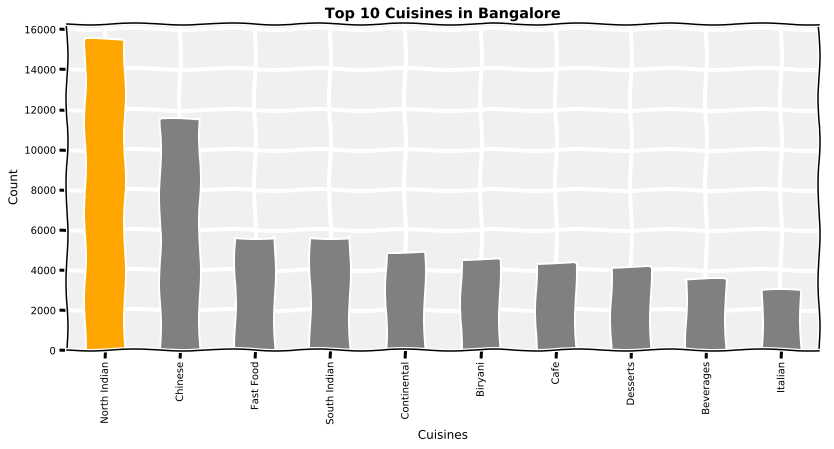

In [61]:
# top 10 cuisines
clear_text_2pd('cuisines').value_counts()[:10].plot('bar',color=colors,grid=True)
plt.title('Top 10 Cuisines in Bangalore', weight='bold')
plt.xlabel('Cuisines')
plt.ylabel('Count');

- As we can notice from the above chart that **North indian** at the top of cuisines provided in Bangalore
- Still we find some bars for Fast Food, Biryani which is not related to specific culture/ or cuisines
- Let's extract those related to country culture wise

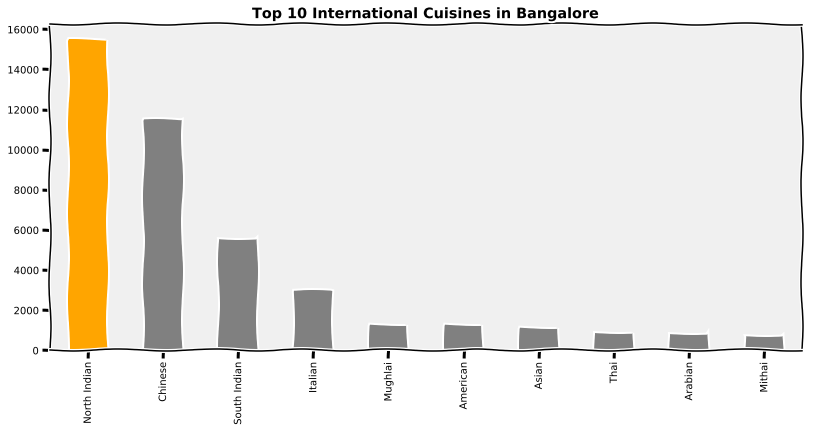

In [62]:
# collect only those related to country culture
intern_cusine = []
for i in clear_text_2pd('cuisines'):
    if i[-2:] == 'an' or i[-2:] == 'se' or i[-2:] == 'ai':
        intern_cusine.append(i)
pd.Series(intern_cusine).value_counts()[:10].plot('bar',color= colors)
plt.title('Top 10 International Cuisines in Bangalore',weight='bold');
del intern_cusine

> - Again **North Indian** at the top, followed by **Chinese** then **South indian**.
> - We can see different cultrurs from all over the world like Italian, American ,Asian and Arabian
> - Highly diversified market

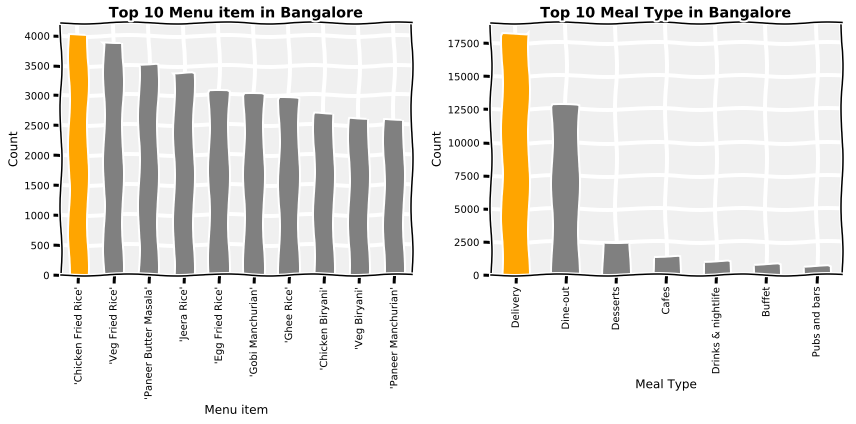

In [63]:
# plot 2 bar plots
plt.rcParams['figure.figsize'] = 12,6
plt.subplot(1,2,1)
# top 10 menu_item
clear_text_2pd('menu_item').value_counts()[:10].plot('bar',color=colors,grid=True)
plt.title('Top 10 Menu item in Bangalore', weight='bold')
plt.xlabel('Menu item')
plt.ylabel('Count')

plt.subplot(1,2,2)
# top 10 meal_type
clear_text_2pd('meal_type').value_counts()[:10].plot('bar',color=colors,grid=True)
plt.title('Top 10 Meal Type in Bangalore', weight='bold')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.tight_layout();

- **Chicken Friend Rice** is the top menu item listed in restaurants in Bangalore.
- That's satisfy our conclusion that the most liked dish and the most reviewed was **Chicken**
- **Delivery** meal_types rocks in Bangalore.

### Rate 

First as we are intersted in the **rate** of a restaurant let's have a look about its distribution among the dataset

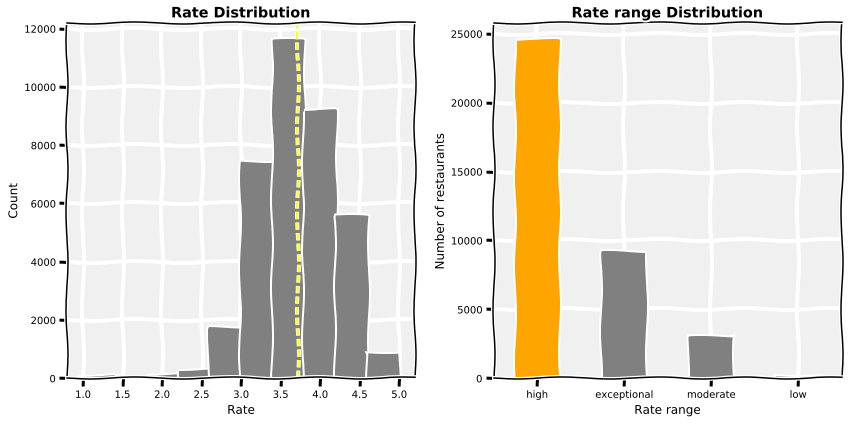

In [64]:
# histogram for restaurants average_rate
plt.rcParams['figure.figsize'] = 12,6
plt.subplot(1,2,1)
data.rate.hist(color='grey')
plt.axvline(x= data.rate.mean(),ls='--',color='yellow')
plt.title('Rate Distribution',weight='bold')
plt.xlabel('Rate')
plt.ylabel('Count')

plt.subplot(1,2,2)
data.rate_range.value_counts().plot('bar',color=colors,grid=True)
plt.title('Rate range Distribution',weight='bold')
plt.xlabel('Rate range')
plt.ylabel('Number of restaurants')
plt.xticks(rotation=0)
plt.tight_layout();

> - As we notice here that it's almost normal distribution with average at **3.7**
> - The majority of restaurants rated beteen 3 and 4 (High range)
> - That cklarify the high competetion in this market in Bangalore.

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


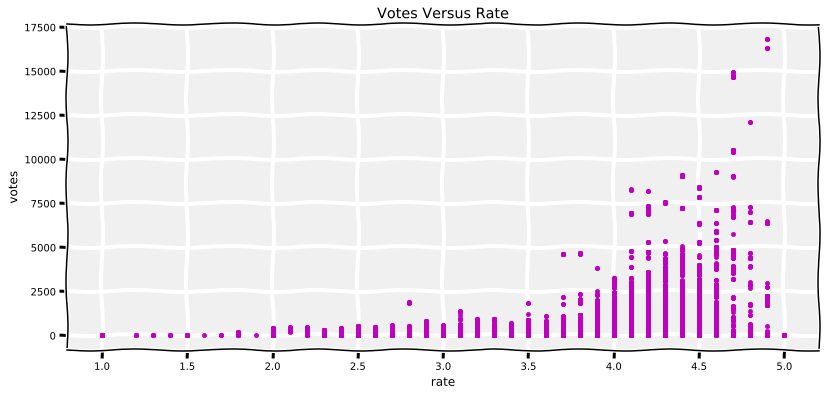

In [65]:
# votes vs rate
data.plot(kind='scatter',x='rate',y='votes',marker='o',color='m',grid=True)
plt.title('Votes Versus Rate');

As expected that those are rated above average are likely getting higher votes

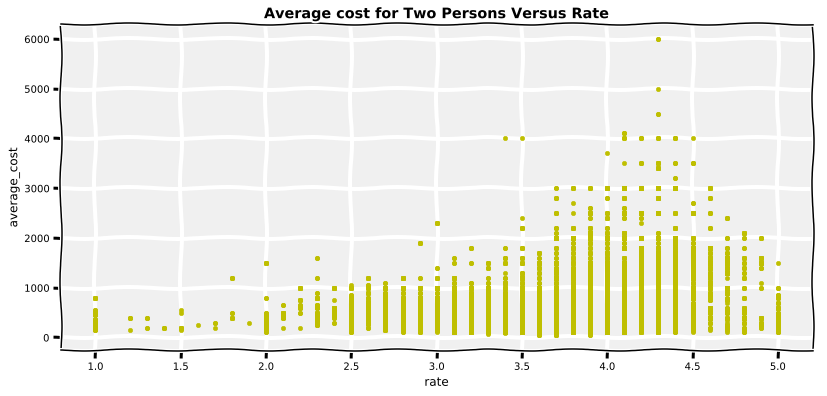

In [66]:
# votes vs rate
data.plot(kind='scatter',x='rate',y='average_cost',marker='o',color='y',grid=True)
plt.title('Average cost for Two Persons Versus Rate',weight='bold');

**Correlation**

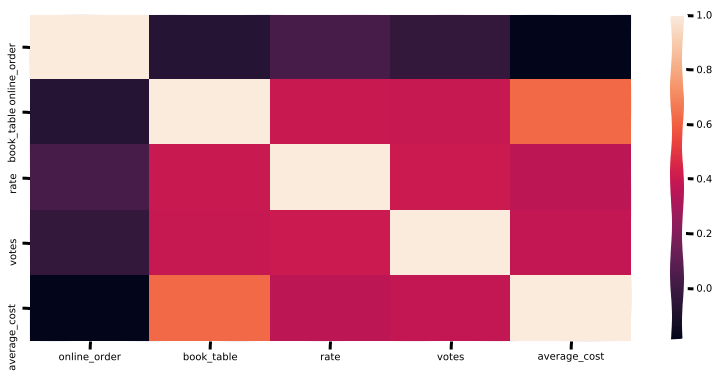

In [67]:
sns.heatmap(data.corr());

## Restaurant Distribution over location

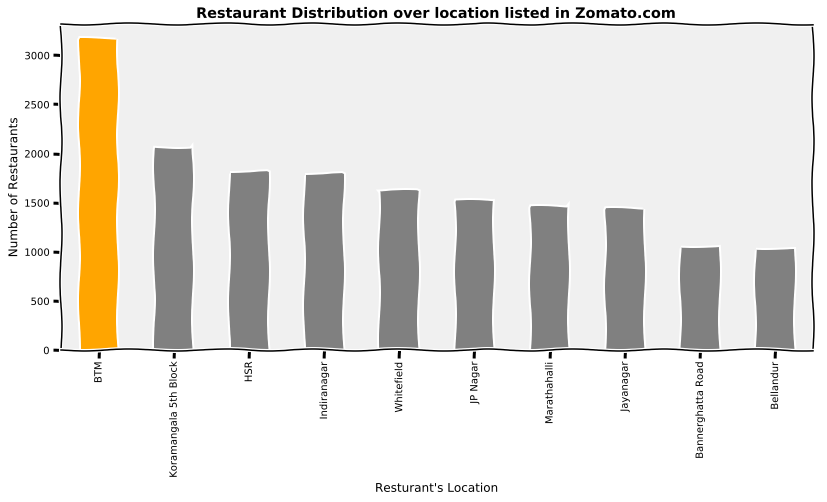

In [68]:
# location
data.location.value_counts()[:10].plot('bar',color=colors)
plt.title('Restaurant Distribution over location listed in Zomato.com',weight='bold')
plt.xlabel('Resturant\'s Location')
plt.ylabel('Number of Restaurants');

BTM has the highest number of restaurnts

## Rate relation with Location

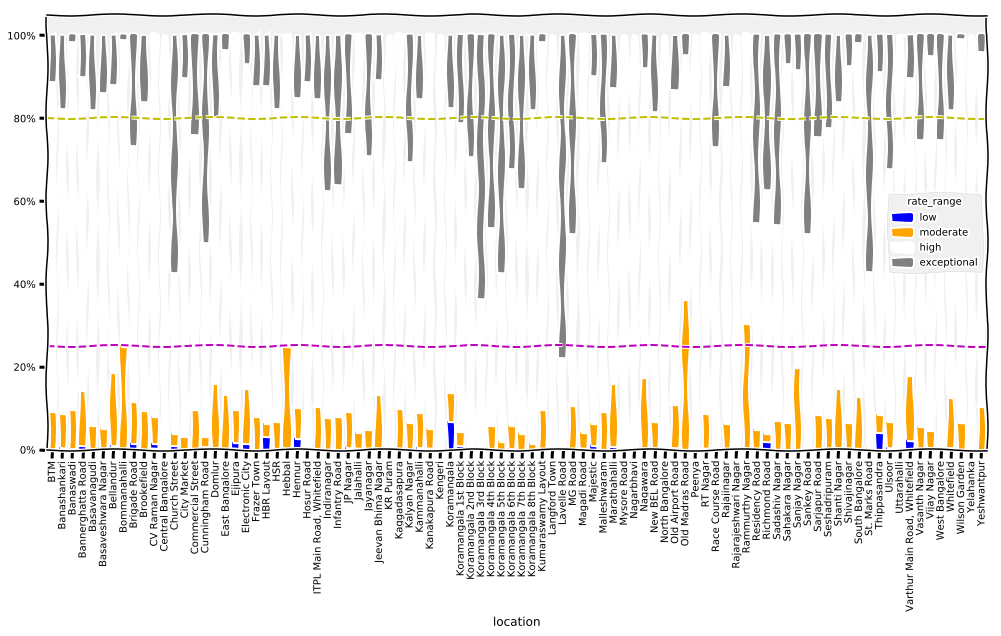

In [69]:
plt.rcParams['figure.figsize'] = 15,8;
data.groupby(['location','rate_range']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).\
unstack().plot(kind='bar',stacked=True,color=['b','orange','w','grey'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.axhline(y =80 ,ls='--',color='y')
plt.axhline(y =25 ,ls='--',color='m');

> - All locations have large numbers of its restaurantas as highly rated restaurants which is matching with previous conclusion
- There are a lot of locations where around 20% of its restaurants are exceptionally rated that means above 4 out 5.
- Brigade Road, Church Street, Lavelle Road, MG Road and Residency Road has more than **30%** of its restaurants are exceprtionally rated
- Lavell Road has the highest percentage around **75%** of its resturants in exceptionally rated categroy
> - It's quiet clear that different locations has different rate style

### Cusine trend per Location

In [70]:
loc_cuisine = data.groupby('location')['cuisines'].value_counts().sort_values(ascending=False)
ind = loc_cuisine.index.levels[0]
top_cuisine , rest_count =[],[]
for i in ind:
    top_cuisine.append(loc_cuisine[i].index[0])
    rest_count.append(loc_cuisine[i][0])

In [71]:
# location's top cuisine
pd.DataFrame({'location':ind,'top_cuisine':top_cuisine,'rest_count':rest_count})


,location,top_cuisine,rest_count
0,BTM,"North Indian, Chinese",256
1,Banashankari,South Indian,48
2,Banaswadi,South Indian,23
3,Bannerghatta Road,"North Indian, Chinese",107
4,Basavanagudi,South Indian,77
5,Basaveshwara Nagar,Desserts,11
6,Bellandur,North Indian,118
7,Bommanahalli,"North Indian, Chinese",12
8,Brigade Road,North Indian,23
9,Brookefield,North Indian,39


- We can see in the above table that  most neighbourhoods are characterised by certain type of cuisine either North or South Indian. 
- some has North Inidan and chinese

In [72]:
del top_cuisine 
del rest_count

### Top Dish liked  per Location

In [73]:
from collections import Counter
loc_dish = data.groupby('location')['dish_liked'].value_counts()
ind = loc_dish.index.levels[0]
top_dish = []
for i in ind:
    dish_counter = Counter([e.strip() for e in ','.join(loc_dish[i].index).split(',') if e])
    top_dish.append(','.join(i[0] for i in dish_counter.most_common()[:1]))

In [74]:
# location's top dish
loc_dish_df = pd.DataFrame({'location':ind,'top_dish':top_dish})
del top_dish
loc_dish_df

,location,top_dish
0,BTM,chicken
1,Banashankari,chicken
2,Banaswadi,chicken
3,Bannerghatta Road,chicken
4,Basavanagudi,coffee
5,Basaveshwara Nagar,biryani
6,Bellandur,chicken
7,Bommanahalli,chicken
8,Brigade Road,chicken
9,Brookefield,chicken


> It seems that a lot of neighbourhoods are characterised by a certain type of dish liked

### 1. How many  Restuarants have online order service? & book table service?

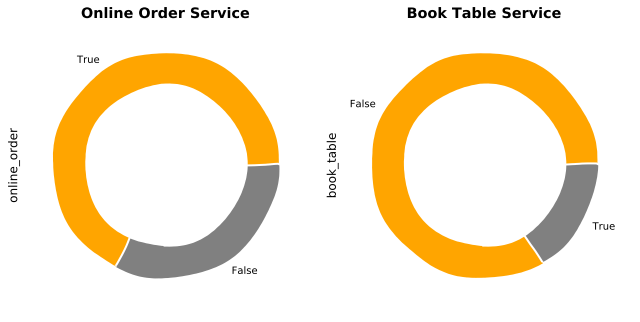

In [75]:
plt.rcParams['figure.figsize'] = 9,6
plt.subplot(1, 2, 1)
data.online_order.value_counts().plot('pie',colors=colors)
# add white circle to male donut plot
w_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(w_circle)
plt.title('Online Order Service',weight ='bold');

plt.subplot(1, 2, 2)
data.book_table.value_counts().plot('pie',colors=colors)
# add white circle to male donut plot
w_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(w_circle)
plt.title('Book Table Service',weight ='bold')
plt.tight_layout();
plt.rcParams['figure.figsize'] = 8,6

In [76]:
# total number of restaurants in dataset
n_rest = data.shape[0]
print(f'Percentage of Restuarants have online order service: {((data.online_order.sum() / n_rest)*100).round(2)} %')
print(f'Percentage of Restuarants have Book table service: {((data.book_table.sum() / n_rest)*100).round(2)} %')

Percentage of Restuarants have online order service: 67.8 %
Percentage of Restuarants have Book table service: 16.38 %


> Its quiet clear that the majority of restaurants in our dataset has online order services but  minority with book table service, which is may due to the nature of city and people styple of living in a hustle life

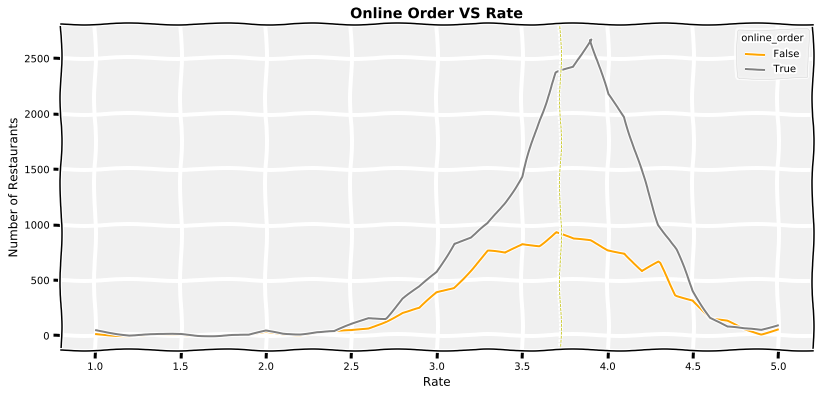

In [77]:
# collect the rate and online order columns
plt.rcParams['figure.figsize'] = 12,6
data_to_plot = pd.crosstab(data.rate, data.online_order)
data_to_plot.plot(grid= True,color=colors);
# set the average rate line
plt.axvline(data.rate.mean(),color="y",linewidth=0.75,ls="--")
plt.title('Online Order VS Rate',weight='bold')
plt.ylabel('Number of Restaurants')
plt.xlabel('Rate');

As we notice from the above chart that having the online order service has no effect on rating the restaurants , except that we can found at the same level of rate there is much number of restaurants that has online order serivce especially above the average rate of 3.7.

#### Where?
#### Answer:
At **Srinidhi Sagar** you can order online with highest average rate at **3.9** for the cheapest average cost for 2 persons

In [78]:
data.query('online_order == True')[['name','rate','average_cost','location']].\
sort_values(by=['average_cost','rate'],ascending=[True,False])[:1]

,name,rate,average_cost,location
17773,Srinidhi Sagar,3.9,40,Old Airport Road


### 3. How the book table service affects the restaurant rate?

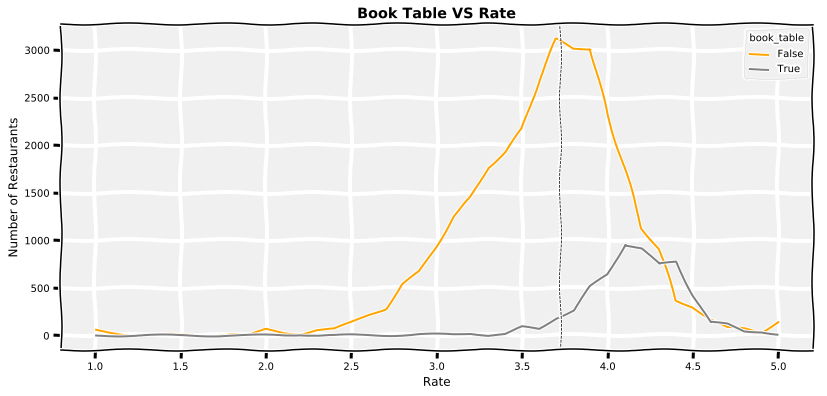

In [79]:
# collect the rate and online order columns
plt.rcParams['figure.figsize'] = 12,6
data_to_plot = pd.crosstab(data['rate'], data['book_table'])
data_to_plot.plot(grid=True,color=colors);
# set the average rate line
plt.axvline(x=data.rate.mean(),color="black",linewidth=0.75,ls="--")
plt.title('Book Table VS Rate',weight='bold')
plt.ylabel('Number of Restaurants')
plt.xlabel('Rate');

More clear here that if your restaturat has not the book table service you still have the opportinity to have a similar rate as other restaurant provide this service.
Most of the restaurant has not this service
- while at rate around 4.2 we notice higher number of restaurants at this rate and provide book_table service

In [80]:
# compare book_table average rate vs all rate
print(f'Average rate for all restaurants: {round(data.rate.mean(),2)}')
print(f"Average rate for book_table serrvice restaurants: {round(data.query('book_table == True')['rate'].mean(),2)}")

Average rate for all restaurants: 3.72
Average rate for book_table serrvice restaurants: 4.16


In [81]:
# online_order rate
data.query('online_order == True')['rate'].mean()

3.732217640228993

In [82]:
# having both sevices
data.query('online_order == True & book_table == True')['rate'].mean()

4.143221513723329

In [83]:
# characteristics of restuarants with book_table service
# set averages of votes, rates and cost in case book_table service
data.query('book_table == True')[['votes','rate','average_cost']].mean()

votes           1208.523620
rate               4.155445
average_cost    1264.868225
dtype: float64

In [84]:
# set averages of votes, rates and cost in case online_order service
data.query('online_order == True')[['votes','rate','average_cost']].mean()

votes           361.175121
rate              3.732218
average_cost    550.932378
dtype: float64

- We can say that having a book_table service is more important than online_order service, likely to get higher rate score!
- People tends to pay more, vote more, and give higher rate scores for restaurants with book_table service
- Awesome !!

#### Where?
#### Answer:

In [85]:
data.query('book_table == True')[['name','rate','average_cost','votes','location']].\
sort_values(by=['average_cost','votes','rate'],ascending=[True,False,False])[:1]

,name,rate,average_cost,votes,location
9460,Fogg,5.0,200,0,BTM


At **Fogg** you can book a table with highest average rate at **5** for the cheapest average cost for 2 persons of **200**

### 4.What is the relation between cost and neighbouhood?

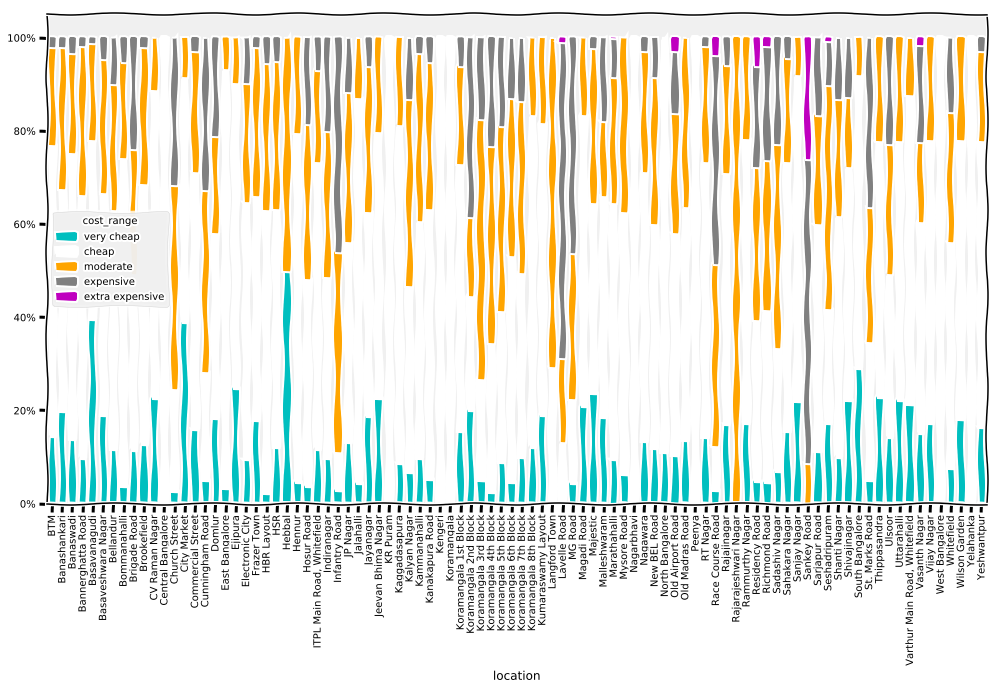

In [86]:
# location versus cost_range
plt.rcParams['figure.figsize'] = 15,9;
data.groupby(['location','cost_range']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).\
unstack().plot(kind='bar',stacked=True,color=['c','w','orange','grey','m'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter());

In [87]:
# number of unique locations in our dataset
data.location.nunique()

92

So croweded as we have **92** locations, but you can notice the following:
> - The majority of restaurants in the cheap price category (200-500) as average-cost for 2 persons
- Some neibourhood has style of cost range like and not limited to:
    1. Central Bamglore & Kengri : 100% of resturants in the cheap region
    2. Lavelle Road: has expensive style majpority
    3. Sankey Road: has expensive and extra expensive restuarants with little moderate and neither cheap nor very cheap
    4. Rajarajeshwari Nagar : has the moderate style of cost_range 500-1000
    5. Hebbbal : divided between very cheap and moderate    
- Likely certain locations affected by the level of population hence the costing strategy differs
To get more focus let seprate those locations to get the idea

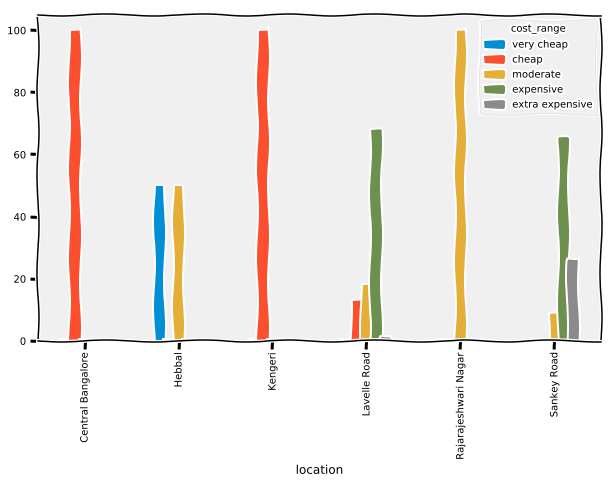

In [88]:
# locations with certain cost style
plt.rcParams['figure.figsize'] = 9,6
loc_cost_df = data.groupby(['location','cost_range']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).\
unstack()
loc_cost_df.query('location == "Hebbal" | location == "Rajarajeshwari Nagar" | location == "Central Bangalore"\
| location == "Lavelle Road"| location == "Kengeri"| location == "Sankey Road"').plot(kind='bar');

### 5.What is the relation between votes and neighbouhood?

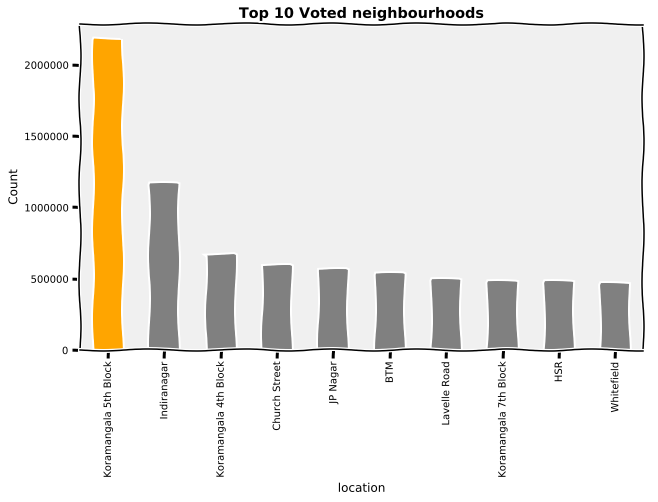

In [89]:
data.groupby('location')['votes'].sum().sort_values(ascending=False)[:10].plot('bar',color=colors)
plt.title('Top 10 Voted neighbourhoods',weight='bold')
plt.ylabel('Count');

> - KM 5th Block has the highest votes

### 6. What are the best restaurants in Bangalore ?

To answer this question let's first define the best restaurant:
This will be as:
- has the highest possible rate , above average plus,
- has the highest number of votes as it will more reliable plus
- has the lowest possible cost

In [90]:
# get the average votes & rate
avg_votes = data.votes.mean()
avg_rate = data.rate.mean()
# get the more reliable and relevant datapoints those with high votes , high rates and from lowest possible price
rel_data = data.query('votes >=@avg_votes & rate >=@avg_rate').sort_values(['average_cost','votes','rate']\
                                                                           ,ascending=[True,False,False])
# the top best list
rel_data[['name','rate','votes','cuisines','average_cost','location']][:10]

,name,rate,votes,cuisines,average_cost,location
3338,Brahmin'S Coffee Bar,4.8,2679,South Indian,100,Basavanagudi
632,Taaza Thindi,4.7,651,South Indian,100,Banashankari
40211,Sri Sairam'S Chats And Juice,4.2,471,Street Food,100,Malleshwaram
46530,Karnataka Bhel House,4.1,453,Street Food,100,Basavanagudi
19599,Puliyogare Point,4.2,449,South Indian,100,Basavanagudi
414,Karnataka Bhel House,4.1,449,Street Food,100,Basavanagudi
3343,Karnataka Bhel House,4.1,449,Street Food,100,Basavanagudi
294,Puliyogare Point,4.2,444,South Indian,100,Basavanagudi
783,Puliyogare Point,4.2,444,South Indian,100,Basavanagudi
2590,Puliyogare Point,4.2,444,South Indian,100,Basavanagudi


Most of these are located in **Basavanagudi** with similar cuisines

### 7. Where one can find the best restaurants in Bangalore?

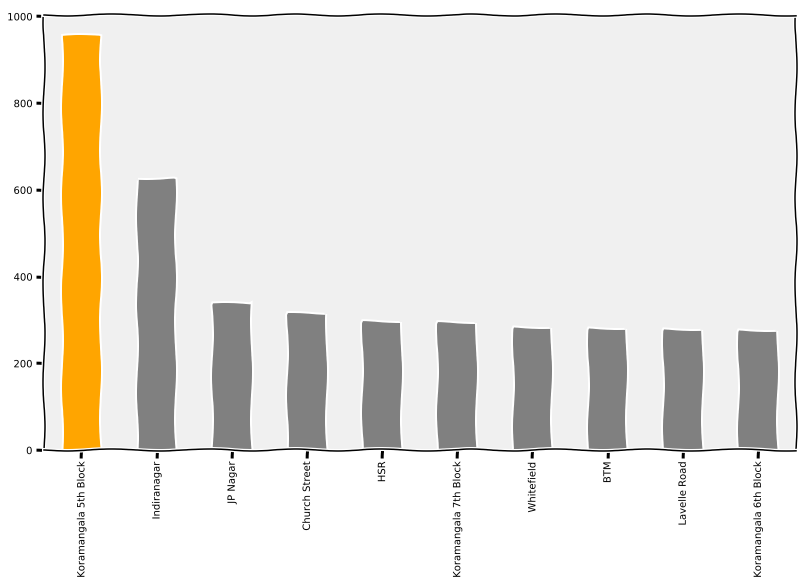

In [91]:
#rel_data.groupby('location')[['rate','votes','rest_type','average_cost']].value_counts()
plt.rcParams['figure.figsize'] = 12,8
rel_data['location'].value_counts()[:10].sort_values(ascending=False).plot('bar',color =colors);

+ Koramangala 7th Block is at the top of the list 
- Without taking average_cost in consideration

### What cuisine?

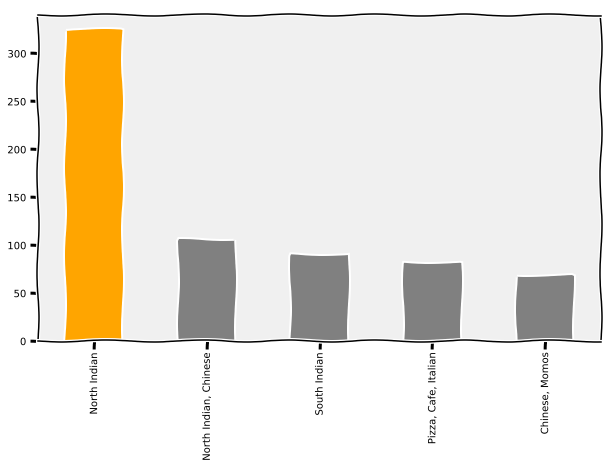

In [92]:
# cusinies from the most reliable data
plt.rcParams['figure.figsize']= 9,6
rel_data['cuisines'].value_counts().sort_values(ascending=False)[:5].plot('bar',color=colors);

- The North indian cuisine at the top of the best by far.

### How much?

In [93]:
# average_price from the most reliable data
rel_data['average_cost'].mean()

1032.508974870363

- The average price for most appreciated restaurants is around 1000 for two persons

### 8.What is the relation between meal_type and location?

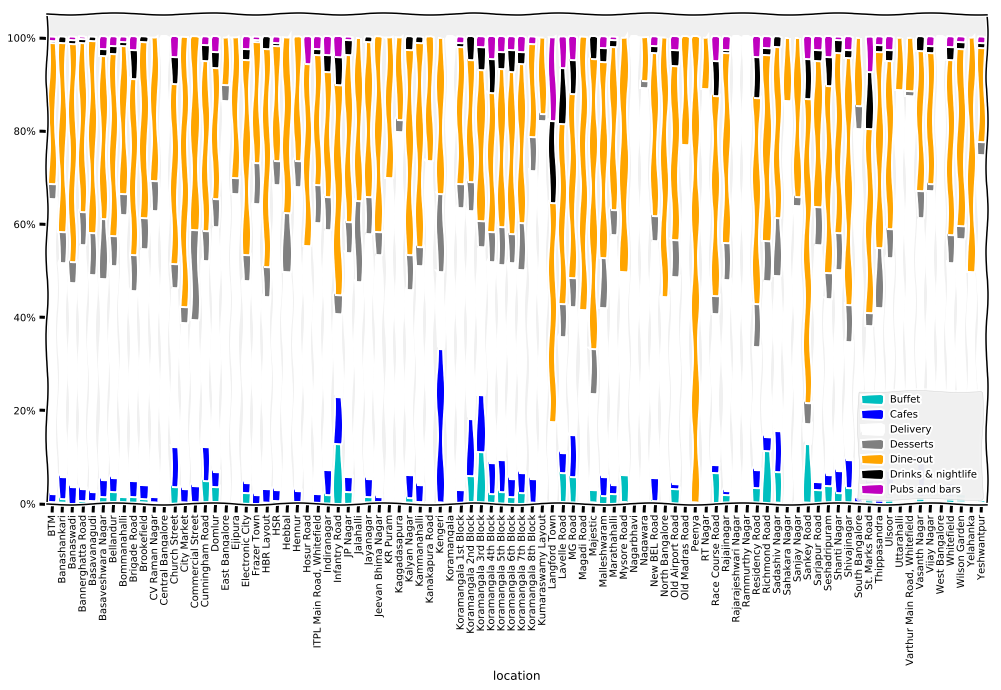

In [94]:
# location versus meal_type
plt.rcParams['figure.figsize'] = 15,9;
data.groupby(['location','meal_type']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).\
unstack().plot(kind='bar',stacked=True,color=['c','b','w','grey','orange','black','m'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc='best');

- Again here if you go through each color you will get the hint that
- Each location has dominat types of meal
- Each meal has tendency to be more in certain locations like:
    1. Kengri has high percentage of its restaurant as Cafe type
    2. Rajarajeshwari Nagar has nothing but Delivery ! same in Central Bangalore
    3. Pennya : 100% as Dineout
    4. Langford Town : you will find the highest mix  of drinks& nightlife and pubs beside dineout
    5. Commercial street: around 20% of its restaiurants in the dessert type

### 9. What is the relation between meal type and the rating?

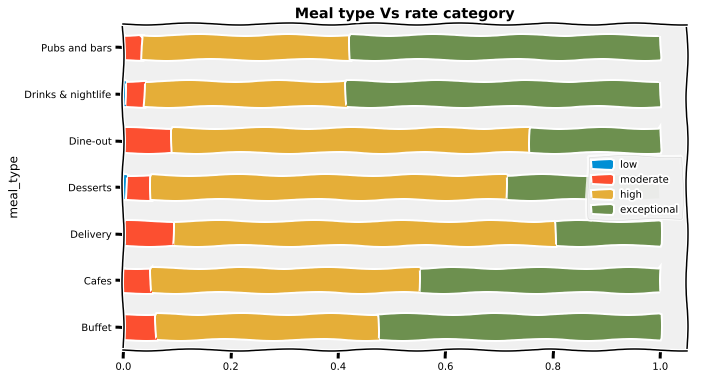

In [95]:
meal_to_rate = pd.crosstab(data['meal_type'], data['rate_range'])
# the cheap area will be colored as white for ease of visibility
plt.rcParams['figure.figsize'] = 9,6
meal_to_rate.div(meal_to_rate.sum(1).astype(float), axis = 0).plot(kind = 'barh', stacked = True)
plt.legend(loc='best')
plt.title('Meal type Vs rate category',weight='bold');

The pubs and Bars & the Drinks and nightlife gets more of rate may be as they are not much located.

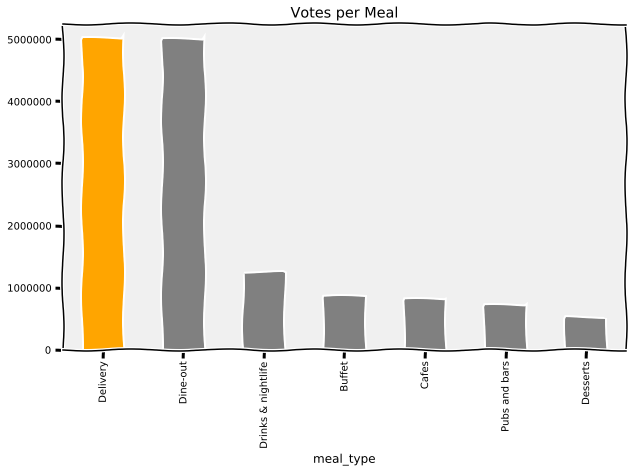

In [96]:
data.groupby('meal_type')['votes'].sum().sort_values(ascending=False).plot('bar',color=colors,title='Votes per Meal');

In [97]:
data.query('rate >= 4.5 & average_cost >= 3000')[['name','votes','rate','average_cost','meal_type','location']].\
sort_values(by=['rate','votes','average_cost'],ascending=[False,False,False])

,name,votes,rate,average_cost,meal_type,location
42165,Rim Naam - The Oberoi,988,4.6,3000,Buffet,MG Road
43180,Rim Naam - The Oberoi,988,4.6,3000,Dine-out,MG Road
47226,Rim Naam - The Oberoi,988,4.6,3000,Buffet,MG Road
48175,Rim Naam - The Oberoi,988,4.6,3000,Dine-out,MG Road
37674,Rim Naam - The Oberoi,986,4.6,3000,Buffet,MG Road
38625,Rim Naam - The Oberoi,986,4.6,3000,Dine-out,MG Road
11547,Rim Naam - The Oberoi,983,4.6,3000,Buffet,MG Road
12572,Rim Naam - The Oberoi,983,4.6,3000,Dine-out,MG Road
4983,Rim Naam - The Oberoi,979,4.6,3000,Buffet,MG Road
6053,Rim Naam - The Oberoi,979,4.6,3000,Dine-out,MG Road


- Rim Naam , Karavall , Alba branches are the top of this group

### Finally , top rated , top voted

In [98]:
# get the max rate
max_rate = data.rate.max()
max_vote = data.votes.max()

data.query('rate <= @max_rate & votes == @max_vote')[['name','votes','rate','average_cost','meal_type','location']].\
sort_values(by=['rate','votes','average_cost'],ascending=[False,False,False])

,name,votes,rate,average_cost,meal_type,location
49170,Byg Brewski Brewing Company,16832,4.9,1600,Delivery,Sarjapur Road
49627,Byg Brewski Brewing Company,16832,4.9,1600,Dine-out,Sarjapur Road
50059,Byg Brewski Brewing Company,16832,4.9,1600,Drinks & nightlife,Sarjapur Road


- Byg Brewski Brewing Company branhces are the top of this group

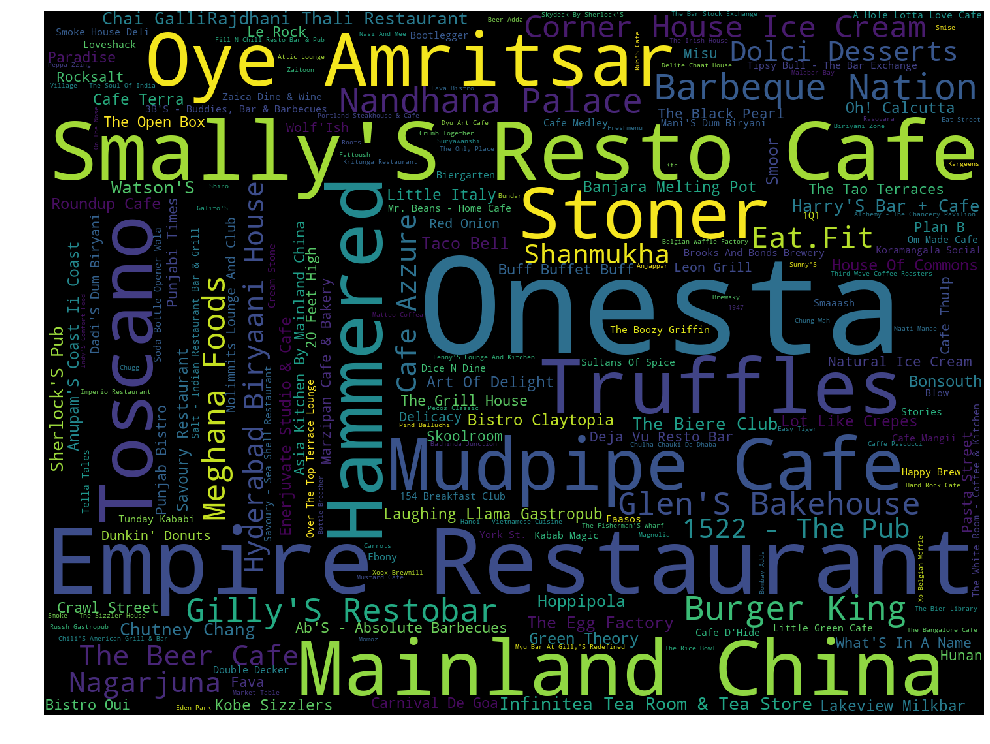

In [99]:

from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080).generate_from_frequencies(rel_data.name.value_counts()))


fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off');



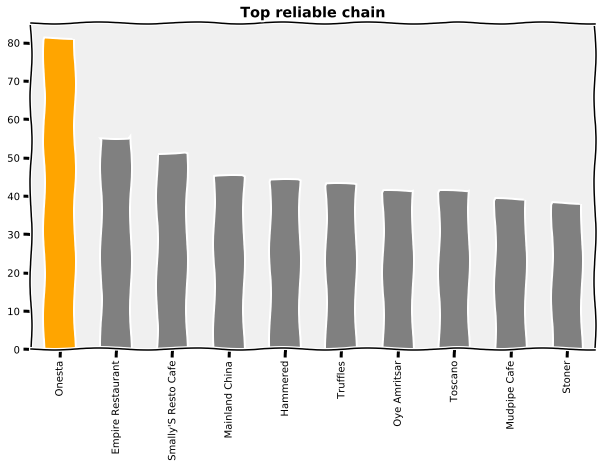

In [100]:
# top reliable chain
rel_data.name.value_counts()[:10].plot('bar',color=colors)
plt.title('Top reliable chain',weight='bold');

The most common chain restaurant with high rate , high votes and good prices is **Onesta**

### Customer mind

In [101]:
text = ' '.join(data.reviews_text)

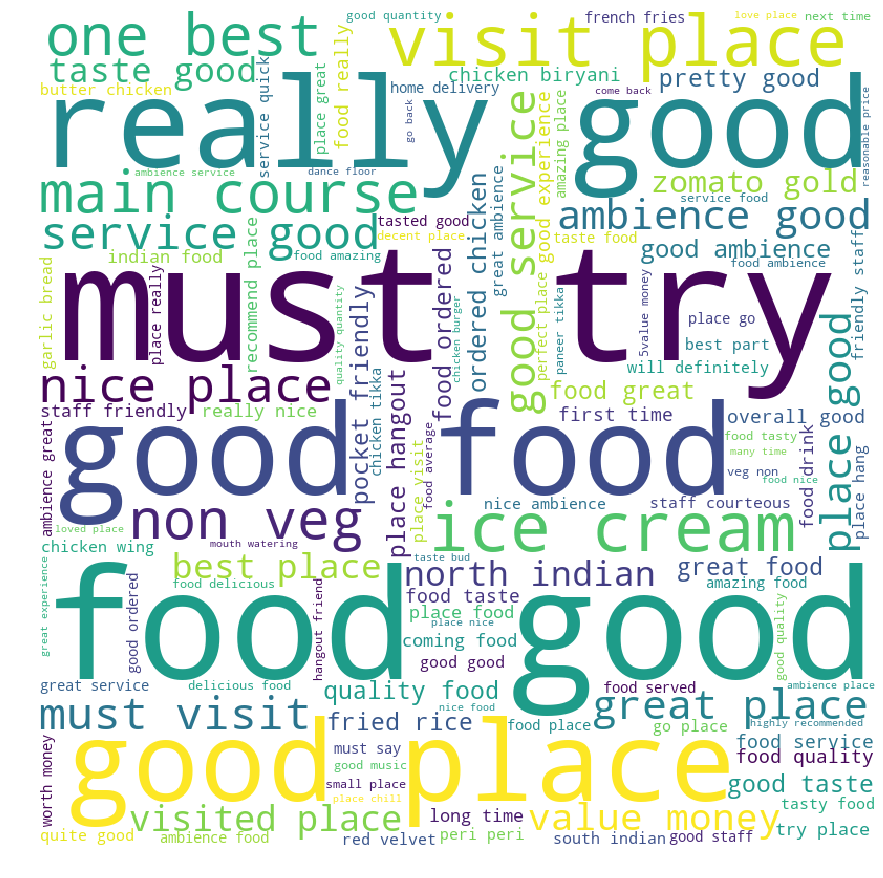

In [102]:
from wordcloud import WordCloud, STOPWORDS 
 
comment_words = ' '
stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

Please upvote and feel free to comment below